In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farhanathif
Your Kaggle Key: ··········


100%|██████████| 42.6M/42.6M [00:00<00:00, 106MB/s] 


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
customers = pd.read_csv('/content/brazilian-ecommerce/olist_customers_dataset.csv')
geo = pd.read_csv('/content/brazilian-ecommerce/olist_geolocation_dataset.csv')
items = pd.read_csv('/content/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('/content/brazilian-ecommerce/olist_products_dataset.csv')
product_category = pd.read_csv('/content/brazilian-ecommerce/product_category_name_translation.csv')

# Set Display Rows and Columns

In [ ]:
# Set max display rows and columns

# pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 14)
pd.set_option("display.max_columns", None)

#Specific Datetime

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# CHANGE THE DATA TYPE OF MULTIPLE COLUMNS TO DATETIME

orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at']= pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']= pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [ ]:
# GETTING VALUES FOR PURCHASE DATE, YEAR, AND MONTH
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y,%m,%d'))

# GETTING VALUES FOR PURCHASE DAY, DAY OF WEEK, AND DAY NAME
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# GETTING VALUES FOR SPECIFIC TIME OF A DAY
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)
orders[:5]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night


#Merging Data

## df1 = Orders + Customers

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night


In [ ]:
orders.info()
orders.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_purchase_year            99441 non-null  int64         
 9   order_purchase_month           99441 non-null  int64         
 10  order_purchase_month_name      99441 non-null  object        
 11  order_purchase_

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
                                 ...  
order_purchase_day                  31
order_purchase_dayofweek             7
order_purchase_dayofweek_name        7
order_purchase_hour                 24
order_purchase_time_day              4
Length: 18, dtype: int64

In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers.info()
customers.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
df1 = pd.merge(orders, customers, how = 'left', on = 'customer_id')
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
df1.nunique()

order_id                    99441
customer_id                 99441
order_status                    8
order_purchase_timestamp    98875
order_approved_at           90733
                            ...  
order_purchase_time_day         4
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
Length: 22, dtype: int64

## df2 = df1 + Reviews

In [ ]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
reviews.info()
reviews.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [ ]:
df2 = pd.merge(df1, reviews, how = 'left', on = 'order_id')
df2 = df2.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])
df2['review_score'].fillna(0, inplace=True)
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,4.0
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0


In [ ]:
df2.nunique()

order_id                    99441
customer_id                 99441
order_status                    8
order_purchase_timestamp    98875
order_approved_at           90733
                            ...  
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
review_score                    6
Length: 23, dtype: int64

In [ ]:
df2.isna().sum()

order_id                      0
customer_id                   0
order_status                  0
order_purchase_timestamp      0
order_approved_at           161
                           ... 
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
review_score                  0
Length: 23, dtype: int64

## df3 = df2 + Payments

In [ ]:
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,4.0
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0


In [ ]:
df2_group = df2.copy()
df2_group_review_score = df2_group.groupby(['order_id'])[['review_score']]
df2_group['avg_review_score'] = df2_group_review_score.transform('mean')
df2_group = df2_group.drop_duplicates(subset = 'order_id')
df2_group = df2_group.drop(columns=['review_score'])
df2_group

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,"2017,10,02",2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,"2018,07,24",24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,"2018,08,08",8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,"2018,02,13",13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,"2017,03,09",9,3,Thu,9,Morning,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,"2018,02,06",6,1,Tue,12,Morning,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,4.0
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,"2017,08,27",27,6,Sun,14,Afternoon,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,"2018,01,08",8,0,Mon,21,Night,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0


In [ ]:
df2_group.nunique()

order_id                    99441
customer_id                 99441
order_status                    8
order_purchase_timestamp    98875
order_approved_at           90733
                            ...  
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
avg_review_score               12
Length: 23, dtype: int64

In [ ]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df3 = pd.merge(payments, df2_group, how = 'left', on = 'order_id')
df3

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,2018,8,Aug,2018.08,"2018,08,07",7,1,Tue,23,Night,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ,5.0


In [ ]:
df3.nunique()

order_id                    99440
payment_sequential             29
payment_type                    5
payment_installments           24
payment_value               29077
                            ...  
customer_unique_id          96095
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
avg_review_score               12
Length: 27, dtype: int64

## df4 = Order Items + Products

In [ ]:
items['spending'] = items.apply(lambda x: x['price']+x['freight_value'], axis=1)
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,spending
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


In [ ]:
items.info()
items.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
 7   spending             112650 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
spending               29149
dtype: int64

In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [ ]:
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
product_category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [ ]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [ ]:
product_edit = pd.merge(products, product_category, how = 'left', on = 'product_category_name')
product_edit = product_edit.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
product_edit['product_category_name'].fillna('not_defined', inplace=True)
product_edit['product_category_name_english'].fillna(product_edit['product_category_name'], inplace=True)
product_edit['product_category_name_english'] = product_edit['product_category_name_english'].replace(["portateis_cozinha_e_preparadores_de_alimentos", 'pc_gamer'], ["kitchen_portables", "gaming_pc_stuff"])
product_edit = product_edit.drop(columns=['product_category_name'])
product_edit

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


In [ ]:
product_edit.nunique()

product_id                       32951
product_category_name_english       74
dtype: int64

In [ ]:
df4 = pd.merge(items, product_edit, how = 'left', on = 'product_id')
df4 = df4.drop(columns=['shipping_limit_date'])
df4

,order_id,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04,garden_tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,343.40,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,386.53,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,116.85,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,64.71,computers_accessories


## df5 = df3 + df4

In [ ]:
df3

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,2018,8,Aug,2018.08,"2018,08,07",7,1,Tue,23,Night,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ,5.0


In [ ]:
df3.info()
df3.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  int64         
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  int64         
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100754 non-null  datetime64[ns]
 11  

order_id                    99440
payment_sequential             29
payment_type                    5
payment_installments           24
payment_value               29077
                            ...  
customer_unique_id          96095
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
avg_review_score               12
Length: 27, dtype: int64

In [ ]:
df4

,order_id,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04,garden_tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,343.40,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,386.53,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,116.85,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,64.71,computers_accessories


In [ ]:
df4.info()
df4.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   spending                       112650 non-null  float64
 7   product_category_name_english  112650 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 7.7+ MB


order_id                         98666
order_item_id                       21
product_id                       32951
seller_id                         3095
price                             5968
freight_value                     6999
spending                         29149
product_category_name_english       74
dtype: int64

In [ ]:
df5 = pd.merge(df3, df4, how = 'inner', on = 'order_id')
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   payment_sequential             117601 non-null  int64         
 2   payment_type                   117601 non-null  object        
 3   payment_installments           117601 non-null  int64         
 4   payment_value                  117601 non-null  float64       
 5   customer_id                    117601 non-null  object        
 6   order_status                   117601 non-null  object        
 7   order_purchase_timestamp       117601 non-null  datetime64[ns]
 8   order_approved_at              117586 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 10  order_delivered_customer_date  115034 non-null  datetime64[ns]
 11  

In [ ]:
df5.nunique()

order_id                         98665
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
                                 ...  
seller_id                         3095
price                             5968
freight_value                     6999
spending                         29149
product_category_name_english       74
Length: 34, dtype: int64

In [ ]:
df5.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).sort_values(by='order_id', ascending=False)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,16
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
6469f99c1f9dfae7733b25662e7f1782,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657f9f721c16800a66c21081d46b18d,1
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1


In [ ]:
df5.groupby(['order_id'])[['payment_sequential']].count().sort_values(by='payment_sequential', ascending=False)

,payment_sequential
order_id,
895ab968e7bb0d5659d16cd74cd1650c,63
fedcd9f7ccdc8cba3a18defedd1a5547,38
fa65dad1b0e818e3ccc5cb0e39231352,29
ccf804e764ed5650cd8759557269dc13,26
a3725dfe487d359b5be08cac48b64ec5,24
...,...
5b8bf01eefd098550791440d7ffc90cc,1
5b8bdf149fa5dca5978d5209a06ea960,1
5b8b4d4819cdb1edb181f172f6cf9a2c,1


In [ ]:
df5.duplicated().sum()

0

# Customers/Users Attributes

## Customers Information & Location

In [ ]:
df_final = customers.copy()
df_final = df_final.drop(columns=['customer_id'])
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_final.drop_duplicates(inplace = True)
df_final.drop_duplicates(subset='customer_unique_id', inplace=True)

In [ ]:
df_final.nunique()

customer_unique_id          96096
customer_zip_code_prefix    14982
customer_city                4118
customer_state                 27
dtype: int64

In [ ]:
df_final.duplicated().sum()

0

In [ ]:
df_final = df_final.reset_index(drop=True)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
96092,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
96093,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
96094,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Total Order

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
total_order = df5.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).reset_index()
df_final = df_final.merge(total_order, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'order_id' : 'total_order'})
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1
...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1


In [ ]:
df_final.sort_values(by='total_order', ascending=False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order
14012,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,16
5070,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9
6953,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7
16655,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP,7
25936,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,7
...,...,...,...,...,...
32722,864ee5b3811408d7153069a1ce1aa05e,13030,campinas,SP,1
32721,9ec142fbcde3077350f40e8f6885d5d6,74715,goiania,GO,1
32720,f2260446f8f9743d4b00e2d0e6ad9b35,90160,porto alegre,RS,1
32719,26171b6533f458799d5dc08df877491a,12912,braganca paulista,SP,1


## Total Product Quantity

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
product_qty_group = df5.groupby(['customer_unique_id', 'order_id'])[['order_item_id']].max()
product_qty_group = product_qty_group.reset_index()
product_qty_group

,customer_unique_id,order_id,order_item_id
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1
...,...,...,...
98660,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2
98661,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,1
98662,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,1
98663,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,1


In [ ]:
product_qty = product_qty_group.groupby(['customer_unique_id'])[['order_item_id']].sum().reset_index()
product_qty = product_qty.rename(columns={'order_item_id' : 'total_product_qty'})
product_qty.sort_values(by='total_product_qty', ascending=False)

,customer_unique_id,total_product_qty
74751,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73154,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18
...,...,...
33836,5a6e80d57bdde6b3a600cfae0c2f5e43,1
33835,5a6d092525ea183026c9b405b903fe0c,1
33834,5a6cda86d79e1ed11d38881398f56c59,1
33833,5a6cd8797286a15f0bf2fb97f024781c,1


In [ ]:
df_final = df_final.merge(product_qty, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1
...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1


## Average Items per Order

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1
...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1


In [ ]:
avg_product_qty = product_qty_group.groupby(['customer_unique_id'])[['order_item_id']].mean().reset_index()
avg_product_qty = avg_product_qty.rename(columns={'order_item_id' : 'avg_items_per_order'})
avg_product_qty.sort_values(by='avg_items_per_order', ascending=False)
avg_product_qty = avg_product_qty.round(decimals=0)
avg_product_qty['avg_items_per_order'] = avg_product_qty['avg_items_per_order'].astype(int)

df_final = df_final.merge(avg_product_qty, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1
...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1


## Total Product Variance

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
product_variance = df5.groupby(['customer_unique_id']).agg({'product_id' : pd.Series.nunique}).reset_index()
df_final = df_final.merge(product_variance, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'product_id' : 'product_variance'})
df_final.sort_values(by='product_variance', ascending=False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance
14012,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,16,16,1,15
5070,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9,14,2,13
25936,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,7,12,2,9
6953,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,9,1,9
25665,c8ed31310fc440a3f8031b177f9842c3,14610,ipua,SP,1,10,10,8
...,...,...,...,...,...,...,...,...
33120,64ef8378b255bc728db76e1b9e61c727,17800,adamantina,SP,1,1,1,1
33119,d99f0b310be3fef729a481b4f892cbda,30640,belo horizonte,MG,1,1,1,1
33118,934e31a23d80cb297d31f16478300038,58039,joao pessoa,PB,1,1,1,1
33117,881656d12d6a866d5bf208ce68cf6949,12236,sao jose dos campos,SP,1,1,1,1


## Total Spending

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
spending_group = df5[['order_id', 'payment_sequential', 'payment_value', 'customer_unique_id', 'order_item_id', 'price', 'freight_value', 'spending']]
spending_group = spending_group.drop_duplicates(subset=['order_id', 'order_item_id'], keep='last')

total_spending = spending_group.groupby(['customer_unique_id'])[['spending']].sum().reset_index()
total_spending = total_spending.round(decimals=2)
df_final = df_final.merge(total_spending, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'spending' : 'total_spending'})
df_final.sort_values(by='total_spending', ascending=False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending
6147,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,1,8,8,1,13664.08
26852,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,2,2,1,2,7571.63
94500,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,1,4,4,1,7274.88
13298,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1,1,1,1,6929.31
20870,459bef486812aa25204be022145caa62,29066,vitoria,ES,1,1,1,1,6922.21
...,...,...,...,...,...,...,...,...,...
13803,6f5b9d1cdccc4d28f0483a612edecacf,2306,sao paulo,SP,1,1,1,1,11.63
39370,2878e5b88167faab17d4fb83a986d38b,3367,sao paulo,SP,1,1,1,1,11.63
65462,b33336f46234b24a613ad9064d13106d,4046,sao paulo,SP,1,1,1,1,10.89
78613,bd06ce0e06ad77a7f681f1a4960a3cc6,4814,sao paulo,SP,1,1,1,1,10.07


## Average Order Value

In [ ]:
df_final['avg_order_value'] = df_final['total_spending'] / df_final['total_order']
df_final['avg_order_value'] = df_final['avg_order_value'].round(decimals=2)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25
...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07


## Standar Deviation Order Value

In [ ]:
spending_group

,order_id,payment_sequential,payment_value,customer_unique_id,order_item_id,price,freight_value,spending
0,b81ef226f3fe1789b1e8b2acac839d17,1,99.33,708ab75d2a007f0564aedd11139c7708,1,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,1,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71,6f70c0b2f7552832ba46eb57b1c5651e,1,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,107.78,87695ed086ebd36f20404c82d20fca87,1,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,128.45,4291db0da71914754618cd789aebcd56,1,113.57,14.88,128.45
...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,363.31,b6027ac07fb76ebca8c97b1887865aee,1,297.00,66.31,363.31
117597,7b905861d7c825891d6347454ea7863f,1,96.80,53b30ca78efb2b7efcd3f9e461587eb2,1,79.00,17.80,96.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,47.77,d3c7da954a324253814096bcaf240e4e,1,39.99,7.78,47.77
117599,b8b61059626efa996a60be9bb9320e10,1,369.54,b84dc68f02f122a88d7e7bbd37b06204,1,349.00,20.54,369.54


In [ ]:
spending_group_unique = spending_group.groupby(['customer_unique_id', 'order_id'])[['spending']].sum().reset_index()
spending_group_unique

,customer_unique_id,order_id,spending
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,27.19
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,43.62
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,196.89
...,...,...,...
98660,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2067.42
98661,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,84.58
98662,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,112.46
98663,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,133.69


In [ ]:
std_spending = spending_group_unique.groupby(['customer_unique_id'])[['spending']].std().reset_index()
std_spending = std_spending.round(decimals=2)
df_final = df_final.merge(std_spending, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'spending' : 'std_order_value'})
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,NaN
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,NaN
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,NaN
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,NaN
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,NaN
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,NaN
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,NaN


In [ ]:
df_final['std_order_value'] = df_final['std_order_value'].fillna(0)

## Average Product Price

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
spending_group

,order_id,payment_sequential,payment_value,customer_unique_id,order_item_id,price,freight_value,spending
0,b81ef226f3fe1789b1e8b2acac839d17,1,99.33,708ab75d2a007f0564aedd11139c7708,1,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,1,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71,6f70c0b2f7552832ba46eb57b1c5651e,1,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,107.78,87695ed086ebd36f20404c82d20fca87,1,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,128.45,4291db0da71914754618cd789aebcd56,1,113.57,14.88,128.45
...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,363.31,b6027ac07fb76ebca8c97b1887865aee,1,297.00,66.31,363.31
117597,7b905861d7c825891d6347454ea7863f,1,96.80,53b30ca78efb2b7efcd3f9e461587eb2,1,79.00,17.80,96.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,47.77,d3c7da954a324253814096bcaf240e4e,1,39.99,7.78,47.77
117599,b8b61059626efa996a60be9bb9320e10,1,369.54,b84dc68f02f122a88d7e7bbd37b06204,1,349.00,20.54,369.54


In [ ]:
avg_price_group = spending_group.groupby(['customer_unique_id'])[['price']].mean().reset_index()
avg_price_group['price'] = avg_price_group['price'].round(decimals=2)
df_final = df_final.merge(avg_price_group, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'price' : 'avg_product_price'})
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00


## Average Shipping Price

In [ ]:
avg_shipp_group = spending_group.groupby(['customer_unique_id'])[['freight_value']].mean().reset_index()
avg_shipp_group['freight_value'] = avg_shipp_group['freight_value'].round(decimals=2)
df_final = df_final.merge(avg_shipp_group, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'freight_value' : 'avg_shipping_price'})
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07


## Average Number of Installments

In [ ]:
df5.sort_values(by='payment_installments', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
22991,2b7dbe9be72b8f9733844c31055c0825,1,credit_card,24,345.39,2b428fc249f5af4989da81ac9af0e735,delivered,2017-11-28 23:56:24,2017-11-29 01:31:28,2017-12-06 22:03:34,2017-12-12 22:48:54,2017-12-26,2017,11,Nov,2017.11,"2017,11,28",28,1,Tue,23,Night,ea9de381796deab8505436f0f4f0b64d,90110,porto alegre,RS,2.0,1,2be7c0f7dd57742c970f856ec64bc25e,96493fab2fbb13a14d0c0e8772eef5c3,208.00,16.22,224.22,computers_accessories
59685,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24,5c8f393ae866c2a2d2e775dbc2409a59,delivered,2017-11-27 13:29:05,2017-11-27 13:39:22,2017-11-28 22:15:05,2017-12-05 18:38:53,2017-12-21,2017,11,Nov,2017.11,"2017,11,27",27,0,Mon,13,Afternoon,d87ea5e1e23e42953de9a2e6aa31c80e,75800,jatai,GO,5.0,3,599dc392f7a23273471b068d72408224,a08692680c77d30a0b4280da5df01c5a,235.00,19.30,254.30,computers_accessories
74643,d8d5cc8b2d42cce90b7ea35e5691a7b1,1,credit_card,24,599.18,ae0709e51a6229f894ccafc894ea4cfe,delivered,2017-11-25 00:23:14,2017-11-25 02:33:01,2017-11-28 03:04:55,2017-11-29 20:17:02,2017-12-13,2017,11,Nov,2017.11,"2017,11,25",25,5,Sat,0,Early morning,ee43ef2ae96c506b7e1949660d6a1d87,41195,salvador,BA,5.0,2,431d674f9a4fbd0957ecf6ba3fcb6899,53243585a1d6dc2643021fd1853d8905,289.00,10.59,299.59,telephony
70345,ef71772d55431467890fda2f45c7bdde,1,credit_card,24,629.64,f1a079060149465974f9fafa727d47e7,delivered,2017-11-30 22:17:14,2017-12-01 10:31:14,2017-12-01 18:15:06,2017-12-04 19:28:53,2017-12-19,2017,11,Nov,2017.11,"2017,11,30",30,3,Thu,22,Night,c0d754ea73f891550ec5cc57f77a34f0,6730,vargem grande paulista,SP,2.0,1,8474d936fee23f0c45620cc2022871cc,2528513dd95219a6013d4d05176e391a,599.00,30.64,629.64,home_confort
115624,f60ce04ff8060152c83c7c97e246d6a8,1,credit_card,24,1440.10,78fc46047c4a639e81ff65f0396e02fe,delivered,2017-11-28 22:24:18,2017-11-28 22:31:34,2017-11-29 19:48:33,2017-12-04 22:22:20,2017-12-18,2017,11,Nov,2017.11,"2017,11,28",28,1,Tue,22,Night,38a4f1deb45ca914dd13c73b41775d71,13820,jaguariuna,SP,1.0,1,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,109.97,34.04,144.01,furniture_living_room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57289,0acdae809654a2de1235d18a12cf73f3,1,debit_card,1,66.07,3180b241917d07e27bd46aac80ded579,delivered,2018-06-14 11:29:22,2018-06-14 12:19:40,2018-06-15 14:22:00,2018-06-19 21:46:19,2018-07-05,2018,6,Jun,2018.06,"2018,06,14",14,3,Thu,11,Morning,06bf11f58f4a6b5ab7dd1623404bf672,30120,belo horizonte,MG,5.0,1,7564c1759c04fc0a38f2aa84f7a370ee,6860153b69cc696d5dcfe1cdaaafcf62,42.97,23.10,66.07,construction_tools_construction
57290,917860628f5261ebf4e484215cfe279c,1,debit_card,1,102.27,a969cfdc9bb0e16f785c81a8bbdd28c0,delivered,2018-06-09 10:14:21,2018-06-09 10:31:44,2018-06-11 11:23:00,2018-06-16 00:40:38,2018-07-03,2018,6,Jun,2018.06,"2018,06,09",9,5,Sat,10,Morning,179323ed9b951f2d45eb0bb3be0ddab3,17605,tupa,SP,1.0,1,610e045d4ebcfde8d0c8991e8b1f39bb,3c03b12bab54d8b37d79d914bfdb1aa0,83.80,18.47,102.27,sports_leisure
91086,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06,2018,5,May,2018.05,"2018,05,15",15,1,Tue,16,Afternoon,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,5.0,2

In [ ]:
installments_group = df5[['order_id', 'payment_sequential', 'payment_installments', 'payment_type', 'payment_value', 'customer_unique_id', 'order_item_id', 'price', 'freight_value', 'spending']]
installments_group = installments_group.drop_duplicates(subset=['order_id', 'payment_sequential'], keep='last')

In [ ]:
installments_group

,order_id,payment_sequential,payment_installments,payment_type,payment_value,customer_unique_id,order_item_id,price,freight_value,spending
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,credit_card,99.33,708ab75d2a007f0564aedd11139c7708,1,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,credit_card,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,1,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71,6f70c0b2f7552832ba46eb57b1c5651e,1,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,8,credit_card,107.78,87695ed086ebd36f20404c82d20fca87,1,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,2,credit_card,128.45,4291db0da71914754618cd789aebcd56,1,113.57,14.88,128.45
...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,1,boleto,363.31,b6027ac07fb76ebca8c97b1887865aee,1,297.00,66.31,363.31
117597,7b905861d7c825891d6347454ea7863f,1,2,credit_card,96.80,53b30ca78efb2b7efcd3f9e461587eb2,1,79.00,17.80,96.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,1,credit_card,47.77,d3c7da954a324253814096bcaf240e4e,1,39.99,7.78,47.77
117599,b8b61059626efa996a60be9bb9320e10,1,5,credit_card,369.54,b84dc68f02f122a88d7e7bbd37b06204,1,349.00,20.54,369.54


In [ ]:
avg_num_installments = installments_group.groupby(['customer_unique_id'])[['payment_installments']].mean().reset_index()
df_final = df_final.merge(avg_num_installments, how='inner', on='customer_unique_id')
df_final = df_final.rename(columns={'payment_installments' : 'avg_num_installments'})
df_final['avg_num_installments'] = df_final['avg_num_installments'].apply(np.ceil)
df_final['avg_num_installments'] = df_final['avg_num_installments'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2


## Modus Number of Installments

In [ ]:
mode_num_installments = installments_group.groupby('customer_unique_id')['payment_installments'].agg(lambda x: x.value_counts().idxmax()).reset_index()
mode_num_installments = mode_num_installments.rename(columns={'payment_installments' : 'mode_num_installments'})
df_final = df_final.merge(mode_num_installments, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2


In [ ]:
df_final[df_final['avg_num_installments'] != df_final['mode_num_installments']]

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments
13,295c05e81917928d76245e842748184d,5704,sao paulo,SP,2,2,1,2,281.50,140.75,147.59,124.48,16.26,7,10
82,6edd17d0a29e2d4057e694afee5eaa3b,28010,campos dos goytacazes,RJ,1,1,1,1,350.19,350.19,0.00,330.00,20.19,2,1
115,60f874c577dc096ecd52bd0bf6bd5942,36780,astolfo dutra,MG,2,2,1,2,138.49,69.24,36.99,53.99,15.26,5,4
133,f34cd7fd85a1f8baff886edf09567be3,89120,timbo,SC,4,4,1,3,1236.76,309.19,128.98,261.75,47.44,5,6
148,ef6b4c0581dbf34e6eb5e33e0094c445,66050,belem,PA,1,1,1,1,60.39,60.39,0.00,39.99,20.40,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94983,7ec163471da7520f672fef86422f42d5,7786,cajamar,SP,1,2,2,1,176.16,176.16,0.00,75.00,13.08,2,1
95222,b6108acc674ae5c99e29adc1047d1049,59650,acu,RN,1,2,2,1,399.28,399.28,0.00,174.80,24.84,6,5
95352,057583d44728a47f6f223414b7e6cc83,11730,mongagua,SP,1,1,1,1,98.68,98.68,0.00,84.00,14.68,5,8
95396,b96d6a178adbabf269fd843b37327798,26112,belford roxo,RJ,1,2,2,1,88.00,88.00,0.00,29.90,14.10,5,8


## Preferred Payment Method

In [ ]:
payments_preferred = installments_group.groupby(['customer_unique_id'])[['payment_type']].agg(lambda x: x.mode().iloc[0] if not x.empty else pd.NA).reset_index()
payments_preferred = payments_preferred.rename(columns={'payment_type' : 'preferred_payment'})
df_final = df_final.merge(payments_preferred, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card


In [ ]:
df_final['preferred_payment'].value_counts()

credit_card    73074
boleto         19105
voucher         1781
debit_card      1459
Name: preferred_payment, dtype: int64

## Total Payment Value

In [ ]:
total_payment = installments_group.groupby(['customer_unique_id'])[['payment_value']].sum().reset_index()
total_payment = total_payment.rename(columns={'payment_value' : 'total_payment_value'})
total_payment = total_payment.round(decimals=2)
df_final = df_final.merge(total_payment, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07


## Voucher Usage Value

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07


In [ ]:
payment_method_value = installments_group.groupby(['customer_unique_id', 'payment_type']).agg({'payment_value':'sum'}).reset_index()
payment_method_value

,customer_unique_id,payment_type,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,27.19
2,0000f46a3911fa3c0805444483337064,credit_card,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,43.62
4,0004aac84e0df4da2b147fca70cf8255,credit_card,196.89
...,...,...,...
97924,fffcf5a5ff07b0908bd4e2dbc735a684,credit_card,2067.42
97925,fffea47cd6d3cc0a88bd621562a9d061,credit_card,84.58
97926,ffff371b4d645b6ecea244b27531430a,credit_card,112.46
97927,ffff5962728ec6157033ef9805bacc48,credit_card,133.69


In [ ]:
voucher_value = payment_method_value[payment_method_value['payment_type'] == 'voucher'].groupby(['customer_unique_id'])[['payment_value']].sum().reset_index()
voucher_value['payment_value'] = voucher_value['payment_value'].round(decimals=2)
voucher_value = voucher_value.rename(columns={'payment_value':'voucher_usage_value'})
voucher_value

,customer_unique_id,voucher_usage_value
0,000e309254ab1fc5ba99dd469d36bdb4,69.89
1,0028a7d8db7b0247652509358ad8d755,293.54
2,00324c9f4d710e7bac5c5ba679714430,31.73
3,0058f300f57d7b93c477a131a59b36c3,175.58
4,0068bd2e9e76c018846dbc6e2bec5ac5,79.51
...,...,...
3668,ff9c04f464ea62ad7787a0218336b942,15.11
3669,ffbb866d7c0d272f9fe12de1b9ee9173,81.96
3670,ffc04aafbf624bd130516cc1d195626a,17.78
3671,ffd4cecb7511e2c62b91b165773dc890,37.77


In [ ]:
df_final = df_final.merge(voucher_value, how='left', on='customer_unique_id')
df_final['voucher_usage_value'].fillna(0, inplace=True)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0


## Voucher Usage Frequency

In [ ]:
voucher_payment = installments_group[installments_group['payment_type'] =='voucher']
voucher_payment

,order_id,payment_sequential,payment_installments,payment_type,payment_value,customer_unique_id,order_item_id,price,freight_value,spending
35,5cfd514482e22bc992e7693f0e3e8df7,2,1,voucher,45.17,e2381d9bb9b49c35fff077d4ae613816,1,689.99,20.59,710.58
49,b2bb080b6bc860118a246fd9b6fad6da,2,1,voucher,24.08,a6aa1df65dedcad75c34bbc175e5a068,1,181.90,16.02,197.92
86,e3e9e3295f4e1512167c232a0aaae8a5,1,1,voucher,50.80,0b11937f7f94a269cc94a3378be84839,1,30.00,20.80,50.80
95,3689194c14ad4e2e7361ebd1df0e77b0,2,1,voucher,57.53,764bf13c9f7df277b9c0950b88b4c3eb,3,38.40,12.69,51.09
112,723e462ce1ee50e024887c0b403130f3,2,1,voucher,100.00,8fcf63613662e902d775fa5aa245c5e0,2,41.90,11.50,53.40
...,...,...,...,...,...,...,...,...,...,...
117338,ded23cb7c51665ec4015e629297ebaea,1,1,voucher,63.42,62e0e75323778a07135f9a25a3831cf2,1,45.00,18.42,63.42
117384,16b2fea16c665281ed07933ee9b9f095,1,1,voucher,91.19,17ba63d7ab0aa24a40802ec2bbd6ab06,1,69.00,22.19,91.19
117458,4fbc2bd17fd14bf9e9b4f28f96351edf,1,1,voucher,27.86,74b8735c819aa3ddb7d86d0ea39efe51,1,16.90,10.96,27.86
117513,59de68e3ef040153cc9ea7978eaec149,1,1,voucher,65.71,b117d1f1ebf30b6c7ebd5ee68505e43c,1,56.99,8.72,65.71


In [ ]:
voucher_freq = voucher_payment.groupby(['customer_unique_id'])[['payment_type']].count().reset_index()
voucher_freq = voucher_freq.rename(columns={'payment_type':'voucher_usage_freq'})
voucher_freq.sort_values(by='voucher_usage_freq')

,customer_unique_id,voucher_usage_freq
0,000e309254ab1fc5ba99dd469d36bdb4,1
2292,a01cd3babae6cb01833af5e5f668bfe2,1
2293,a02685a9f440693ea63b9ea8ffa85a3b,1
2294,a02e04835582ffd73a04417c2f7fd58b,1
2295,a0361c0779cda9416bf7aba3a0f7884b,1
...,...,...
527,2524dcec233c3766f2c2b22f69fd65f4,21
3574,f9ae226291893fda10af7965268fb7f6,21
1214,569aa12b73b5f7edeaa6f2a01603e381,25
1997,8af7ac63b2efbcbd88e5b11505e8098a,29


In [ ]:
df_final = df_final.merge(voucher_freq, how='left', on='customer_unique_id')
df_final['voucher_usage_freq'].fillna(0, inplace=True)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0.0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0.0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0.0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0.0


In [ ]:
df_final['voucher_usage_freq'] = df_final['voucher_usage_freq'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0


## Average Rating Score

In [ ]:
df5

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,2018.04,"2018,04,25",25,2,Wed,22,Night,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1.0,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,99.33,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,2018.06,"2018,06,26",26,1,Tue,11,Morning,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,5.0,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,24.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017,12,Dec,2017.12,"2017,12,12",12,1,Tue,11,Morning,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,5.0,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,65.71,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017,12,Dec,2017.12,"2017,12,06",6,2,Wed,12,Morning,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5.0,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90,17.88,107.78,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018,5,May,2018.05,"2018,05,21",21,0,Mon,13,Afternoon,4291db0da71914754618cd789aebcd56,18570,conchas,SP,5.0,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57,14.88,128.45,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117599,b8b61059626efa996a60be9bb932

In [ ]:
review_group = df5[['order_id', 'payment_sequential', 'payment_installments', 'payment_type', 'payment_value', 'customer_unique_id', 'order_item_id', 'avg_review_score']]
review_group = review_group.drop_duplicates(subset=['order_id', 'payment_sequential'], keep='last')
rating_review_score = review_group.groupby(['customer_unique_id'])[['avg_review_score']].mean().reset_index()
rating_review_score = rating_review_score.round(decimals=1)
df_final = df_final.merge(rating_review_score, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0


In [ ]:
df_final.sort_values(by='total_order', ascending=False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score
14012,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,16,16,1,15,902.04,56.38,39.76,45.60,10.78,2,1,credit_card,902.04,0.00,0,5.0
5070,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9,14,2,13,1172.67,130.30,91.72,71.49,12.27,8,5,credit_card,1172.66,0.00,0,2.8
6953,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,9,1,9,959.01,137.00,80.70,89.91,16.64,1,1,boleto,959.01,28.72,1,5.0
16655,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP,7,9,1,5,758.83,108.40,77.63,73.80,10.51,3,1,credit_card,758.83,0.00,0,5.0
25936,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,7,12,2,9,1122.72,160.39,77.07,67.22,26.34,1,1,credit_card,1122.72,0.00,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32722,864ee5b3811408d7153069a1ce1aa05e,13030,campinas,SP,1,1,1,1,79.33,79.33,0.00,69.99,9.34,1,1,credit_card,79.33,0.00,0,4.0
32721,9ec142fbcde3077350f40e8f6885d5d6,74715,goiania,GO,1,1,1,1,215.14,215.14,0.00,199.00,16.14,4,4,credit_card,215.14,0.00,0,1.0
32720,f2260446f8f9743d4b00e2d0e6ad9b35,90160,porto alegre,RS,1,2,2,1,313.28,313.28,0.00,139.90,16.74,2,2,credit_card,313.28,0.00,0,1.0
32719,26171b6533f458799d5dc08df877491a,12912,braganca paulista,SP,1,1,1,1,55.35,55.35,0.00,43.50,11.85,2,2,credit_card,55.35,0.00,0,5.0


## Satisfacton Level

In [ ]:
# Buat kategory tingkat kepuasan tiap pelanggan

def satisfaction(x):
    if (x >= 4.0):
        return 'satisfied'
    elif (x >= 3.0) & (x < 4.0):
        return 'less_satisfied'
    elif (x > 0.0) & (x < 3.0):
        return 'dissapointed'
    else:
        return 'unknown'

df_final['satisfaction_level'] = df_final['avg_review_score'].apply(satisfaction)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied


In [ ]:
df_final['satisfaction_level'].value_counts()

satisfied         73217
dissapointed      13439
less_satisfied     8064
unknown             699
Name: satisfaction_level, dtype: int64

## Total Orders Reviewed

In [ ]:
review_group

,order_id,payment_sequential,payment_installments,payment_type,payment_value,customer_unique_id,order_item_id,avg_review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,credit_card,99.33,708ab75d2a007f0564aedd11139c7708,1,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,credit_card,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,1,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71,6f70c0b2f7552832ba46eb57b1c5651e,1,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,8,credit_card,107.78,87695ed086ebd36f20404c82d20fca87,1,5.0
4,42fdf880ba16b47b59251dd489d4441a,1,2,credit_card,128.45,4291db0da71914754618cd789aebcd56,1,5.0
...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,1,boleto,363.31,b6027ac07fb76ebca8c97b1887865aee,1,5.0
117597,7b905861d7c825891d6347454ea7863f,1,2,credit_card,96.80,53b30ca78efb2b7efcd3f9e461587eb2,1,5.0
117598,32609bbb3dd69b3c066a6860554a77bf,1,1,credit_card,47.77,d3c7da954a324253814096bcaf240e4e,1,1.0
117599,b8b61059626efa996a60be9bb9320e10,1,5,credit_card,369.54,b84dc68f02f122a88d7e7bbd37b06204,1,5.0


In [ ]:
cust_review = review_group[review_group['avg_review_score'] != 0]
cust_review

,order_id,payment_sequential,payment_installments,payment_type,payment_value,customer_unique_id,order_item_id,avg_review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,credit_card,99.33,708ab75d2a007f0564aedd11139c7708,1,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,credit_card,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,1,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71,6f70c0b2f7552832ba46eb57b1c5651e,1,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,8,credit_card,107.78,87695ed086ebd36f20404c82d20fca87,1,5.0
4,42fdf880ba16b47b59251dd489d4441a,1,2,credit_card,128.45,4291db0da71914754618cd789aebcd56,1,5.0
...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,1,boleto,363.31,b6027ac07fb76ebca8c97b1887865aee,1,5.0
117597,7b905861d7c825891d6347454ea7863f,1,2,credit_card,96.80,53b30ca78efb2b7efcd3f9e461587eb2,1,5.0
117598,32609bbb3dd69b3c066a6860554a77bf,1,1,credit_card,47.77,d3c7da954a324253814096bcaf240e4e,1,1.0
117599,b8b61059626efa996a60be9bb9320e10,1,5,credit_card,369.54,b84dc68f02f122a88d7e7bbd37b06204,1,5.0


In [ ]:
orders_reviewed = cust_review.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).reset_index()
orders_reviewed = orders_reviewed.rename(columns={'order_id' : 'total_orders_reviewed'})
df_final = df_final.merge(orders_reviewed, how='left', on='customer_unique_id')
df_final['total_orders_reviewed'].fillna(0, inplace=True)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1.0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1.0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1.0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1.0


In [ ]:
df_final['total_orders_reviewed'] = df_final['total_orders_reviewed'].astype(int)

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1


In [ ]:
df_final['total_orders_reviewed'].value_counts()

1     91851
2      2635
0       699
3       186
4        29
5         9
6         5
7         3
9         1
16        1
Name: total_orders_reviewed, dtype: int64

## First Order Date

In [ ]:
df_edit_order = df5.copy()
df_edit_order = df_edit_order.sort_values(by=['payment_sequential', 'order_item_id'], ascending=False)
df_edit_order = df_edit_order.drop_duplicates(subset=['order_id'], keep='last')
df_edit_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
787,900fac51d850dfc38fceb9c413441c67,2,debit_card,1,98.33,9f1c1125dfe6ebc040a6265c3dc6a8a2,delivered,2018-01-31 12:16:54,2018-01-31 14:08:21,2018-02-06 16:56:37,2018-02-19 19:51:15,2018-02-22,2018,1,Jan,2018.01,"2018,01,31",31,2,Wed,12,Morning,85b5710ffe40c500140b840b25f24cb9,21920,rio de janeiro,RJ,5.0,1,cab49aa7c76189e7e6d55ad8c7f9eb91,33ac3e28642ab8bda860a2f693000e78,82.99,15.34,98.33,sports_leisure
2872,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38,65e4681470e66fa92770a629a7ec0884,delivered,2018-02-20 19:24:41,2018-02-20 20:40:59,2018-02-21 22:49:18,2018-03-23 19:50:50,2018-03-14,2018,2,Feb,2018.02,"2018,02,20",20,1,Tue,19,Night,8d21b846e69c263edf74b4c8211d99a0,20211,rio de janeiro,RJ,1.0,1,f8cc518b0812bb0ee889350296f284e4,b18dc380845b24038cfc48006478f099,389.90,16.48,406.38,cool_stuff
4016,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,debit_card,1,35.00,acac7c47f37fdb07e2bfe3932a997d3b,delivered,2018-01-17 13:21:41,2018-01-17 14:56:22,2018-01-18 23:18:53,2018-01-24 19:52:56,2018-02-21,2018,1,Jan,2018.01,"2018,01,17",17,2,Wed,13,Afternoon,ca786ed29e0b265f60c9fd3b691e75a5,13569,sao carlos,SP,5.0,1,651fe753ea1d6ad3d5744c1bffd3d6e1,7178f9f4dd81dcef02f62acdf8151e01,19.90,15.10,35.00,health_beauty
4248,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11,a18c450e6894a2463743b1136a8ef609,delivered,2018-03-19 15:00:57,2018-03-19 15:17:41,2018-03-23 21:34:31,2018-03-28 19:33:14,2018-04-06,2018,3,Mar,2018.03,"2018,03,19",19,0,Mon,15,Afternoon,9a1c494f8a6f4eea5af94cd55b370780,13185,hortolandia,SP,5.0,1,1649163ed6805e0d648900a0b2c0fe4d,f5a590cf36251cf1162ea35bef76fe84,315.00,15.11,330.11,musical_instruments
5477,e17ed9c20d79f29256a4a514e8d07230,2,debit_card,1,118.43,f02281ff50731e8a5e07bbc0a45d4912,delivered,2018-04-21 19:02:39,2018-04-24 18:59:40,2018-04-23 19:03:19,2018-04-24 19:34:31,2018-05-08,2018,4,Apr,2018.04,"2018,04,21",21,5,Sat,19,Night,664f84621d39978eea0931e1ccd848e2,11702,praia grande,SP,5.0,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,109.90,8.53,118.43,audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117

In [ ]:
first_order = df_edit_order.groupby(['customer_unique_id'])[['order_purchase_timestamp']].min().reset_index()
first_order = first_order.rename(columns = {'order_purchase_timestamp':'first_order_date'})
df_final = df_final.merge(first_order, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33


In [ ]:
df_final.sort_values(by='total_order', ascending=False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date
14012,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,16,16,1,15,902.04,56.38,39.76,45.60,10.78,2,1,credit_card,902.04,0.00,0,5.0,satisfied,16,2017-05-15 23:30:03
5070,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9,14,2,13,1172.67,130.30,91.72,71.49,12.27,8,5,credit_card,1172.66,0.00,0,2.8,dissapointed,9,2017-09-18 18:53:15
6953,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,9,1,9,959.01,137.00,80.70,89.91,16.64,1,1,boleto,959.01,28.72,1,5.0,satisfied,7,2017-11-13 16:44:41
16655,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP,7,9,1,5,758.83,108.40,77.63,73.80,10.51,3,1,credit_card,758.83,0.00,0,5.0,satisfied,7,2017-09-19 01:02:44
25936,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,7,12,2,9,1122.72,160.39,77.07,67.22,26.34,1,1,credit_card,1122.72,0.00,0,5.0,satisfied,7,2017-10-09 12:34:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32722,864ee5b3811408d7153069a1ce1aa05e,13030,campinas,SP,1,1,1,1,79.33,79.33,0.00,69.99,9.34,1,1,credit_card,79.33,0.00,0,4.0,satisfied,1,2017-12-04 20:42:20
32721,9ec142fbcde3077350f40e8f6885d5d6,74715,goiania,GO,1,1,1,1,215.14,215.14,0.00,199.00,16.14,4,4,credit_card,215.14,0.00,0,1.0,dissapointed,1,2018-02-13 13:10:16
32720,f2260446f8f9743d4b00e2d0e6ad9b35,90160,porto alegre,RS,1,2,2,1,313.28,313.28,0.00,139.90,16.74,2,2,credit_card,313.28,0.00,0,1.0,dissapointed,1,2018-01-22 11:41:56
32719,26171b6533f458799d5dc08df877491a,12912,braganca paulista,SP,1,1,1,1,55.35,55.35,0.00,43.50,11.85,2,2,credit_card,55.35,0.00,0,5.0,satisfied,1,2017-06-03 16:21:36


## Last Order Date

In [ ]:
last_order = df_edit_order.groupby(['customer_unique_id'])[['order_purchase_timestamp']].max().reset_index()
last_order = last_order.rename(columns = {'order_purchase_timestamp':'last_order_date'})
df_final = df_final.merge(last_order, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33


## Delta Last First Order Date

In [ ]:
df_final['delta_last_first'] = (df_final['last_order_date'] - df_final['first_order_date']).dt.days
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0


## Customer Usertime

In [ ]:
df_edit_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english
787,900fac51d850dfc38fceb9c413441c67,2,debit_card,1,98.33,9f1c1125dfe6ebc040a6265c3dc6a8a2,delivered,2018-01-31 12:16:54,2018-01-31 14:08:21,2018-02-06 16:56:37,2018-02-19 19:51:15,2018-02-22,2018,1,Jan,2018.01,"2018,01,31",31,2,Wed,12,Morning,85b5710ffe40c500140b840b25f24cb9,21920,rio de janeiro,RJ,5.0,1,cab49aa7c76189e7e6d55ad8c7f9eb91,33ac3e28642ab8bda860a2f693000e78,82.99,15.34,98.33,sports_leisure
2872,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38,65e4681470e66fa92770a629a7ec0884,delivered,2018-02-20 19:24:41,2018-02-20 20:40:59,2018-02-21 22:49:18,2018-03-23 19:50:50,2018-03-14,2018,2,Feb,2018.02,"2018,02,20",20,1,Tue,19,Night,8d21b846e69c263edf74b4c8211d99a0,20211,rio de janeiro,RJ,1.0,1,f8cc518b0812bb0ee889350296f284e4,b18dc380845b24038cfc48006478f099,389.90,16.48,406.38,cool_stuff
4016,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,debit_card,1,35.00,acac7c47f37fdb07e2bfe3932a997d3b,delivered,2018-01-17 13:21:41,2018-01-17 14:56:22,2018-01-18 23:18:53,2018-01-24 19:52:56,2018-02-21,2018,1,Jan,2018.01,"2018,01,17",17,2,Wed,13,Afternoon,ca786ed29e0b265f60c9fd3b691e75a5,13569,sao carlos,SP,5.0,1,651fe753ea1d6ad3d5744c1bffd3d6e1,7178f9f4dd81dcef02f62acdf8151e01,19.90,15.10,35.00,health_beauty
4248,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11,a18c450e6894a2463743b1136a8ef609,delivered,2018-03-19 15:00:57,2018-03-19 15:17:41,2018-03-23 21:34:31,2018-03-28 19:33:14,2018-04-06,2018,3,Mar,2018.03,"2018,03,19",19,0,Mon,15,Afternoon,9a1c494f8a6f4eea5af94cd55b370780,13185,hortolandia,SP,5.0,1,1649163ed6805e0d648900a0b2c0fe4d,f5a590cf36251cf1162ea35bef76fe84,315.00,15.11,330.11,musical_instruments
5477,e17ed9c20d79f29256a4a514e8d07230,2,debit_card,1,118.43,f02281ff50731e8a5e07bbc0a45d4912,delivered,2018-04-21 19:02:39,2018-04-24 18:59:40,2018-04-23 19:03:19,2018-04-24 19:34:31,2018-05-08,2018,4,Apr,2018.04,"2018,04,21",21,5,Sat,19,Night,664f84621d39978eea0931e1ccd848e2,11702,praia grande,SP,5.0,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,109.90,8.53,118.43,audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,39.99,7.78,47.77,auto
117

In [ ]:
first_order

,customer_unique_id,first_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95415,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95416,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95417,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
df_edit_order['order_age'] = (df_edit_order['order_purchase_timestamp'].max() - df_edit_order['order_purchase_timestamp']).dt.days
usertime = df_edit_order.groupby(['customer_unique_id'])[['order_age']].max().reset_index()
usertime = usertime.rename(columns={'order_age' : 'usertime'})
df_final = df_final.merge(usertime, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303


## Average Days for 1 Order

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303


In [ ]:
df_final['avg_days_order'] = (df_final['usertime'] / df_final['total_order'])
df_final['avg_days_order'] = df_final['avg_days_order'].apply(np.ceil)
df_final['avg_days_order'] = df_final['avg_days_order'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303


## Recency Days

In [ ]:
df_final['recency_days'] = (df_final['last_order_date'].max() - df_final['last_order_date']).dt.days

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303


## Total Order By Year

### 2016

In [ ]:
df_edit_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english,order_age
787,900fac51d850dfc38fceb9c413441c67,2,debit_card,1,98.33,9f1c1125dfe6ebc040a6265c3dc6a8a2,delivered,2018-01-31 12:16:54,2018-01-31 14:08:21,2018-02-06 16:56:37,2018-02-19 19:51:15,2018-02-22,2018,1,Jan,2018.01,"2018,01,31",31,2,Wed,12,Morning,85b5710ffe40c500140b840b25f24cb9,21920,rio de janeiro,RJ,5.0,1,cab49aa7c76189e7e6d55ad8c7f9eb91,33ac3e28642ab8bda860a2f693000e78,82.99,15.34,98.33,sports_leisure,214
2872,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38,65e4681470e66fa92770a629a7ec0884,delivered,2018-02-20 19:24:41,2018-02-20 20:40:59,2018-02-21 22:49:18,2018-03-23 19:50:50,2018-03-14,2018,2,Feb,2018.02,"2018,02,20",20,1,Tue,19,Night,8d21b846e69c263edf74b4c8211d99a0,20211,rio de janeiro,RJ,1.0,1,f8cc518b0812bb0ee889350296f284e4,b18dc380845b24038cfc48006478f099,389.90,16.48,406.38,cool_stuff,194
4016,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,debit_card,1,35.00,acac7c47f37fdb07e2bfe3932a997d3b,delivered,2018-01-17 13:21:41,2018-01-17 14:56:22,2018-01-18 23:18:53,2018-01-24 19:52:56,2018-02-21,2018,1,Jan,2018.01,"2018,01,17",17,2,Wed,13,Afternoon,ca786ed29e0b265f60c9fd3b691e75a5,13569,sao carlos,SP,5.0,1,651fe753ea1d6ad3d5744c1bffd3d6e1,7178f9f4dd81dcef02f62acdf8151e01,19.90,15.10,35.00,health_beauty,228
4248,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11,a18c450e6894a2463743b1136a8ef609,delivered,2018-03-19 15:00:57,2018-03-19 15:17:41,2018-03-23 21:34:31,2018-03-28 19:33:14,2018-04-06,2018,3,Mar,2018.03,"2018,03,19",19,0,Mon,15,Afternoon,9a1c494f8a6f4eea5af94cd55b370780,13185,hortolandia,SP,5.0,1,1649163ed6805e0d648900a0b2c0fe4d,f5a590cf36251cf1162ea35bef76fe84,315.00,15.11,330.11,musical_instruments,167
5477,e17ed9c20d79f29256a4a514e8d07230,2,debit_card,1,118.43,f02281ff50731e8a5e07bbc0a45d4912,delivered,2018-04-21 19:02:39,2018-04-24 18:59:40,2018-04-23 19:03:19,2018-04-24 19:34:31,2018-05-08,2018,4,Apr,2018.04,"2018,04,21",21,5,Sat,19,Night,664f84621d39978eea0931e1ccd848e2,11702,praia grande,SP,5.0,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,109.90,8.53,118.43,audio,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights,178
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery,380
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2

In [ ]:
order_2016 = df_edit_order[df_edit_order['order_purchase_year'] == 2016]
total_order_2016 = order_2016.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).reset_index()
df_final = df_final.merge(total_order_2016, how='left', on='customer_unique_id')
df_final = df_final.rename(columns={'order_id' : 'total_order_2016'})
df_final['total_order_2016'].fillna(0, inplace=True)
df_final['total_order_2016'] = df_final['total_order_2016'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0


### 2017

In [ ]:
order_2017 = df_edit_order[df_edit_order['order_purchase_year'] == 2017]
total_order_2017 = order_2017.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).reset_index()
df_final = df_final.merge(total_order_2017, how='left', on='customer_unique_id')
df_final = df_final.rename(columns={'order_id' : 'total_order_2017'})
df_final['total_order_2017'].fillna(0, inplace=True)
df_final['total_order_2017'] = df_final['total_order_2017'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1


### 2018

In [ ]:
order_2018 = df_edit_order[df_edit_order['order_purchase_year'] == 2018]
total_order_2018 = order_2018.groupby(['customer_unique_id']).agg({'order_id' : pd.Series.nunique}).reset_index()
df_final = df_final.merge(total_order_2018, how='left', on='customer_unique_id')
df_final = df_final.rename(columns={'order_id' : 'total_order_2018'})
df_final['total_order_2018'].fillna(0, inplace=True)
df_final['total_order_2018'] = df_final['total_order_2018'].astype(int)
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0


## Modus Month Order

In [ ]:
df_edit_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english,order_age
787,900fac51d850dfc38fceb9c413441c67,2,debit_card,1,98.33,9f1c1125dfe6ebc040a6265c3dc6a8a2,delivered,2018-01-31 12:16:54,2018-01-31 14:08:21,2018-02-06 16:56:37,2018-02-19 19:51:15,2018-02-22,2018,1,Jan,2018.01,"2018,01,31",31,2,Wed,12,Morning,85b5710ffe40c500140b840b25f24cb9,21920,rio de janeiro,RJ,5.0,1,cab49aa7c76189e7e6d55ad8c7f9eb91,33ac3e28642ab8bda860a2f693000e78,82.99,15.34,98.33,sports_leisure,214
2872,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38,65e4681470e66fa92770a629a7ec0884,delivered,2018-02-20 19:24:41,2018-02-20 20:40:59,2018-02-21 22:49:18,2018-03-23 19:50:50,2018-03-14,2018,2,Feb,2018.02,"2018,02,20",20,1,Tue,19,Night,8d21b846e69c263edf74b4c8211d99a0,20211,rio de janeiro,RJ,1.0,1,f8cc518b0812bb0ee889350296f284e4,b18dc380845b24038cfc48006478f099,389.90,16.48,406.38,cool_stuff,194
4016,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,debit_card,1,35.00,acac7c47f37fdb07e2bfe3932a997d3b,delivered,2018-01-17 13:21:41,2018-01-17 14:56:22,2018-01-18 23:18:53,2018-01-24 19:52:56,2018-02-21,2018,1,Jan,2018.01,"2018,01,17",17,2,Wed,13,Afternoon,ca786ed29e0b265f60c9fd3b691e75a5,13569,sao carlos,SP,5.0,1,651fe753ea1d6ad3d5744c1bffd3d6e1,7178f9f4dd81dcef02f62acdf8151e01,19.90,15.10,35.00,health_beauty,228
4248,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11,a18c450e6894a2463743b1136a8ef609,delivered,2018-03-19 15:00:57,2018-03-19 15:17:41,2018-03-23 21:34:31,2018-03-28 19:33:14,2018-04-06,2018,3,Mar,2018.03,"2018,03,19",19,0,Mon,15,Afternoon,9a1c494f8a6f4eea5af94cd55b370780,13185,hortolandia,SP,5.0,1,1649163ed6805e0d648900a0b2c0fe4d,f5a590cf36251cf1162ea35bef76fe84,315.00,15.11,330.11,musical_instruments,167
5477,e17ed9c20d79f29256a4a514e8d07230,2,debit_card,1,118.43,f02281ff50731e8a5e07bbc0a45d4912,delivered,2018-04-21 19:02:39,2018-04-24 18:59:40,2018-04-23 19:03:19,2018-04-24 19:34:31,2018-05-08,2018,4,Apr,2018.04,"2018,04,21",21,5,Sat,19,Night,664f84621d39978eea0931e1ccd848e2,11702,praia grande,SP,5.0,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,109.90,8.53,118.43,audio,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights,178
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery,380
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2

In [ ]:
modus_month = df_edit_order.groupby(['customer_unique_id'])[['order_purchase_month_name']].agg(lambda x: x.mode().iloc[0] if not x.empty else pd.NA).reset_index()
modus_month = modus_month.rename(columns={'order_purchase_month_name' : 'preferred_month_order'})
df_final = df_final.merge(modus_month, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov


## Modus Day Order

In [ ]:
modus_day = df_edit_order.groupby(['customer_unique_id'])[['order_purchase_dayofweek_name']].agg(lambda x: x.mode().iloc[0] if not x.empty else pd.NA).reset_index()
modus_day = modus_day.rename(columns={'order_purchase_dayofweek_name' : 'preferred_day_order'})
df_final = df_final.merge(modus_day, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri


## Modus TImeday Order

In [ ]:
modus_timeday = df_edit_order.groupby(['customer_unique_id'])[['order_purchase_time_day']].agg(lambda x: x.mode().iloc[0] if not x.empty else pd.NA).reset_index()
modus_timeday = modus_timeday.rename(columns={'order_purchase_time_day' : 'preferred_timeday_order'})
df_final = df_final.merge(modus_timeday, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue,Afternoon
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri,Night
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat,Afternoon
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue,Afternoon
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat,Afternoon
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed,Morning
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun,Night
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri,Night


## Preferred Product Category

In [ ]:
df_edit_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,order_item_id,product_id,seller_id,price,freight_value,spending,product_category_name_english,order_age
787,900fac51d850dfc38fceb9c413441c67,2,debit_card,1,98.33,9f1c1125dfe6ebc040a6265c3dc6a8a2,delivered,2018-01-31 12:16:54,2018-01-31 14:08:21,2018-02-06 16:56:37,2018-02-19 19:51:15,2018-02-22,2018,1,Jan,2018.01,"2018,01,31",31,2,Wed,12,Morning,85b5710ffe40c500140b840b25f24cb9,21920,rio de janeiro,RJ,5.0,1,cab49aa7c76189e7e6d55ad8c7f9eb91,33ac3e28642ab8bda860a2f693000e78,82.99,15.34,98.33,sports_leisure,214
2872,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38,65e4681470e66fa92770a629a7ec0884,delivered,2018-02-20 19:24:41,2018-02-20 20:40:59,2018-02-21 22:49:18,2018-03-23 19:50:50,2018-03-14,2018,2,Feb,2018.02,"2018,02,20",20,1,Tue,19,Night,8d21b846e69c263edf74b4c8211d99a0,20211,rio de janeiro,RJ,1.0,1,f8cc518b0812bb0ee889350296f284e4,b18dc380845b24038cfc48006478f099,389.90,16.48,406.38,cool_stuff,194
4016,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,debit_card,1,35.00,acac7c47f37fdb07e2bfe3932a997d3b,delivered,2018-01-17 13:21:41,2018-01-17 14:56:22,2018-01-18 23:18:53,2018-01-24 19:52:56,2018-02-21,2018,1,Jan,2018.01,"2018,01,17",17,2,Wed,13,Afternoon,ca786ed29e0b265f60c9fd3b691e75a5,13569,sao carlos,SP,5.0,1,651fe753ea1d6ad3d5744c1bffd3d6e1,7178f9f4dd81dcef02f62acdf8151e01,19.90,15.10,35.00,health_beauty,228
4248,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11,a18c450e6894a2463743b1136a8ef609,delivered,2018-03-19 15:00:57,2018-03-19 15:17:41,2018-03-23 21:34:31,2018-03-28 19:33:14,2018-04-06,2018,3,Mar,2018.03,"2018,03,19",19,0,Mon,15,Afternoon,9a1c494f8a6f4eea5af94cd55b370780,13185,hortolandia,SP,5.0,1,1649163ed6805e0d648900a0b2c0fe4d,f5a590cf36251cf1162ea35bef76fe84,315.00,15.11,330.11,musical_instruments,167
5477,e17ed9c20d79f29256a4a514e8d07230,2,debit_card,1,118.43,f02281ff50731e8a5e07bbc0a45d4912,delivered,2018-04-21 19:02:39,2018-04-24 18:59:40,2018-04-23 19:03:19,2018-04-24 19:34:31,2018-05-08,2018,4,Apr,2018.04,"2018,04,21",21,5,Sat,19,Night,664f84621d39978eea0931e1ccd848e2,11702,praia grande,SP,5.0,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,109.90,8.53,118.43,audio,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,2018,3,Mar,2018.03,"2018,03,08",8,3,Thu,16,Afternoon,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,5.0,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,297.00,66.31,363.31,construction_tools_lights,178
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,2017,8,Aug,2017.08,"2017,08,18",18,4,Fri,9,Morning,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,5.0,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,79.00,17.80,96.80,stationery,380
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,2017,11,Nov,2017.11,"2017,11,18",18,5,Sat,17,Afternoon,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,1.0,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2

In [ ]:
preferred_product = df_edit_order.groupby(['customer_unique_id'])[['product_category_name_english']].agg(lambda x: x.mode().iloc[0] if not x.empty else pd.NA).reset_index()
preferred_product = preferred_product.rename(columns={'product_category_name_english' : 'preferred_product_category'})
df_final = df_final.merge(preferred_product, how='inner', on='customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order,preferred_product_category
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue,Afternoon,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri,Night,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat,Afternoon,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue,Afternoon,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun,Morning,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat,Afternoon,books_general_interest
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed,Morning,sports_leisure
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun,Night,health_beauty
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri,Night,watches_gifts


## RFM Segmentation

In [ ]:
df_rfm = df_final[['customer_unique_id', 'recency_days', 'total_order', 'total_spending']]
df_rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']
df_rfm

,customer_unique_id,recency,frequency,monetary
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,233,1,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,106,1,157.73
3,259dac757896d24d7702b9acbbff3f3c,173,1,173.30
4,345ecd01c38d18a9036ed96c73b8d066,35,1,252.25
...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,148,1,88.78
95415,d52a67c98be1cf6a5c84435bd38d095d,152,1,129.06
95416,e9f50caf99f032f0bf3c55141f019d99,147,1,56.04
95417,73c2643a0a458b49f58cea58833b192e,303,1,711.07


In [ ]:
df_rfm['frequency'].value_counts()

1     92506
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

<ipython-input-126-066955484f80>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_rfm['recency'], shade=True, ax=axes[0])
<ipython-input-126-066955484f80>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_rfm['frequency'], shade=True, ax=axes[1])
<ipython-input-126-066955484f80>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_rfm['monetary'], shade=True, ax=axes[2])


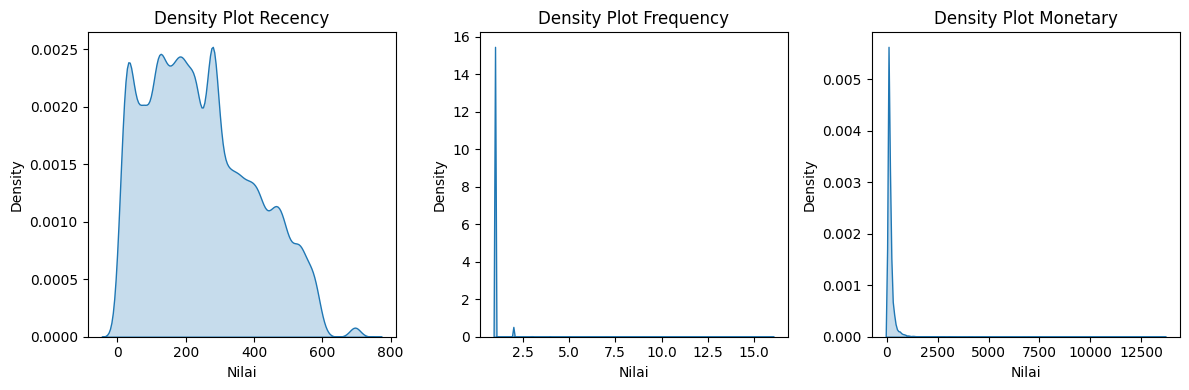

In [ ]:
# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Density plot untuk kolom 'recency'
sns.kdeplot(data=df_rfm['recency'], shade=True, ax=axes[0])
axes[0].set_title('Density Plot Recency')
axes[0].set_xlabel('Nilai')
axes[0].set_ylabel('Density')

# Density plot untuk kolom 'frequency'
sns.kdeplot(data=df_rfm['frequency'], shade=True, ax=axes[1])
axes[1].set_title('Density Plot Frequency')
axes[1].set_xlabel('Nilai')
axes[1].set_ylabel('Density')

# Density plot untuk kolom 'monetary'
sns.kdeplot(data=df_rfm['monetary'], shade=True, ax=axes[2])
axes[2].set_title('Density Plot Monetary')
axes[2].set_xlabel('Nilai')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
df_rfm['monetary'].value_counts()

77.57      246
35.00      160
73.34      148
116.94     125
65.00      109
          ... 
396.97       1
2151.29      1
49.50        1
693.67       1
92.36        1
Name: monetary, Length: 27959, dtype: int64

In [ ]:
# recency score
df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], 5, labels = [5, 4, 3, 2, 1])

# frequency score

# karena distribusi frekuensi sangat tidak seimbang dan banyak, pendekatan yang digunakan adalah dengan menentukan batas kategori secara manual
# berdasarkan frekuensi masing-masing nilai 'frequency')
conditions = [
    (df_rfm['frequency'] == 1),
    (df_rfm['frequency'] == 2),
    (df_rfm['frequency'] == 3),
    (df_rfm['frequency'] == 4),
    (df_rfm['frequency'] >= 5)
]
choices = [1, 2, 3, 4, 5]  # Memberikan nilai kategori yang sesuai dengan kondisi

df_rfm['frequency_score'] = np.select(conditions, choices, default=np.nan)  # Menambahkan kolom frequency_score berdasarkan kondisi
df_rfm['frequency_score'] = df_rfm['frequency_score'].astype(int)

df_rfm['monetary_score'] = pd.qcut(df_rfm['monetary'], 5, labels = [1, 2, 3, 4, 5])
df_rfm

<ipython-input-128-733f6ecdc683>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], 5, labels = [5, 4, 3, 2, 1])
<ipython-input-128-733f6ecdc683>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['frequency_score'] = np.select(conditions, choices, default=np.nan)  # Menambahkan kolom frequency_score berdasarkan kondisi
<ipython-input-128-733f6ecdc683>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,1,1,4
1,290c77bc529b7ac935b93aa66c333dc3,233,1,335.48,3,1,5
2,060e732b5b29e8181a18229c7b0b2b5e,106,1,157.73,4,1,4
3,259dac757896d24d7702b9acbbff3f3c,173,1,173.30,4,1,4
4,345ecd01c38d18a9036ed96c73b8d066,35,1,252.25,5,1,5
...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,148,1,88.78,4,1,3
95415,d52a67c98be1cf6a5c84435bd38d095d,152,1,129.06,4,1,3
95416,e9f50caf99f032f0bf3c55141f019d99,147,1,56.04,4,1,2
95417,73c2643a0a458b49f58cea58833b192e,303,1,711.07,2,1,5


In [ ]:
df_rfm['rf_score'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm

<ipython-input-129-ff5647eb5bc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['rf_score'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)


,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,1,1,4,11
1,290c77bc529b7ac935b93aa66c333dc3,233,1,335.48,3,1,5,31
2,060e732b5b29e8181a18229c7b0b2b5e,106,1,157.73,4,1,4,41
3,259dac757896d24d7702b9acbbff3f3c,173,1,173.30,4,1,4,41
4,345ecd01c38d18a9036ed96c73b8d066,35,1,252.25,5,1,5,51
...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,148,1,88.78,4,1,3,41
95415,d52a67c98be1cf6a5c84435bd38d095d,152,1,129.06,4,1,3,41
95416,e9f50caf99f032f0bf3c55141f019d99,147,1,56.04,4,1,2,41
95417,73c2643a0a458b49f58cea58833b192e,303,1,711.07,2,1,5,21


In [ ]:
# Seg_map is customer group.
seg_map = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at_Risk',
    r'[1-2]5' : 'cant_loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]' : 'champions'}

df_rfm['rfm_segment'] = df_rfm['rf_score'].replace(seg_map, regex = True)
df_rfm

<ipython-input-130-bb4c097d399b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['rfm_segment'] = df_rfm['rf_score'].replace(seg_map, regex = True)


,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,rfm_segment
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,1,1,4,11,hibernating
1,290c77bc529b7ac935b93aa66c333dc3,233,1,335.48,3,1,5,31,about_to_sleep
2,060e732b5b29e8181a18229c7b0b2b5e,106,1,157.73,4,1,4,41,promising
3,259dac757896d24d7702b9acbbff3f3c,173,1,173.30,4,1,4,41,promising
4,345ecd01c38d18a9036ed96c73b8d066,35,1,252.25,5,1,5,51,new_customers
...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,148,1,88.78,4,1,3,41,promising
95415,d52a67c98be1cf6a5c84435bd38d095d,152,1,129.06,4,1,3,41,promising
95416,e9f50caf99f032f0bf3c55141f019d99,147,1,56.04,4,1,2,41,promising
95417,73c2643a0a458b49f58cea58833b192e,303,1,711.07,2,1,5,21,hibernating


In [ ]:
df_rfm['rfm_segment'].value_counts()

hibernating            38042
about_to_sleep         19082
new_customers          18553
promising              18377
potential_loyalists     1222
at_Risk                   71
need_attention            31
champions                 21
loyal_customers           19
cant_loose                 1
Name: rfm_segment, dtype: int64

In [ ]:
df_rfm_group = df_rfm[['customer_unique_id', 'recency_score', 'frequency_score', 'monetary_score', 'rfm_segment']]
df_final = df_final.merge(df_rfm_group, how = 'inner', on = 'customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order,preferred_product_category,recency_score,frequency_score,monetary_score,rfm_segment
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue,Afternoon,office_furniture,1,1,4,hibernating
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri,Night,housewares,3,1,5,about_to_sleep
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat,Afternoon,office_furniture,4,1,4,promising
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue,Afternoon,office_furniture,4,1,4,promising
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun,Morning,home_confort,5,1,5,new_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat,Afternoon,books_general_interest,4,1,3,promising
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed,Morning,sports_leisure,4,1,3,promising
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun,Night,health_beauty,4,1,2,promising
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri,Night,watches_gifts,2,1,5,hibernating


## Customer Lifetime Value (CLTV)

In [ ]:
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order,preferred_product_category,recency_score,frequency_score,monetary_score,rfm_segment
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue,Afternoon,office_furniture,1,1,4,hibernating
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri,Night,housewares,3,1,5,about_to_sleep
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat,Afternoon,office_furniture,4,1,4,promising
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue,Afternoon,office_furniture,4,1,4,promising
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun,Morning,home_confort,5,1,5,new_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat,Afternoon,books_general_interest,4,1,3,promising
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed,Morning,sports_leisure,4,1,3,promising
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun,Night,health_beauty,4,1,2,promising
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri,Night,watches_gifts,2,1,5,hibernating


In [ ]:
df_cltv = df_final[['customer_unique_id', 'total_order', 'total_spending', 'avg_order_value']]
df_cltv

,customer_unique_id,total_order,total_spending,avg_order_value
0,861eff4711a542e4b93843c6dd7febb0,1,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,252.25,252.25
...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,1,88.78,88.78
95415,d52a67c98be1cf6a5c84435bd38d095d,1,129.06,129.06
95416,e9f50caf99f032f0bf3c55141f019d99,1,56.04,56.04
95417,73c2643a0a458b49f58cea58833b192e,1,711.07,711.07


In [ ]:
df_cltv['purchase_frequency'] = df_cltv['total_order'] / df_cltv.shape[0]

# asumsikan profit rate dari perusahaan adalah 0.1 atau 10%
df_cltv['profit_margin'] = df_cltv['total_spending'] * 0.10

repeat_rate = df_cltv[df_cltv['total_order'] > 1].shape[0] / df_cltv.shape[0]
churn_rate = 1 - repeat_rate
df_cltv['customer_value'] = df_cltv['avg_order_value'] * df_cltv['purchase_frequency']
df_cltv

<ipython-input-135-8e53c8307fdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cltv['purchase_frequency'] = df_cltv['total_order'] / df_cltv.shape[0]
<ipython-input-135-8e53c8307fdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cltv['profit_margin'] = df_cltv['total_spending'] * 0.10
<ipython-input-135-8e53c8307fdd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,customer_unique_id,total_order,total_spending,avg_order_value,purchase_frequency,profit_margin,customer_value
0,861eff4711a542e4b93843c6dd7febb0,1,146.87,146.87,0.00001,14.687,0.001539
1,290c77bc529b7ac935b93aa66c333dc3,1,335.48,335.48,0.00001,33.548,0.003516
2,060e732b5b29e8181a18229c7b0b2b5e,1,157.73,157.73,0.00001,15.773,0.001653
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,173.30,0.00001,17.330,0.001816
4,345ecd01c38d18a9036ed96c73b8d066,1,252.25,252.25,0.00001,25.225,0.002644
...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,1,88.78,88.78,0.00001,8.878,0.000930
95415,d52a67c98be1cf6a5c84435bd38d095d,1,129.06,129.06,0.00001,12.906,0.001353
95416,e9f50caf99f032f0bf3c55141f019d99,1,56.04,56.04,0.00001,5.604,0.000587
95417,73c2643a0a458b49f58cea58833b192e,1,711.07,711.07,0.00001,71.107,0.007452


In [ ]:
df_cltv['cltv'] = df_cltv['customer_value'] / churn_rate * df_cltv['profit_margin']
df_cltv

<ipython-input-136-b3c67d98c28f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cltv['cltv'] = df_cltv['customer_value'] / churn_rate * df_cltv['profit_margin']


,customer_unique_id,total_order,total_spending,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv
0,861eff4711a542e4b93843c6dd7febb0,1,146.87,146.87,0.00001,14.687,0.001539,0.023318
1,290c77bc529b7ac935b93aa66c333dc3,1,335.48,335.48,0.00001,33.548,0.003516,0.121664
2,060e732b5b29e8181a18229c7b0b2b5e,1,157.73,157.73,0.00001,15.773,0.001653,0.026894
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,173.30,0.00001,17.330,0.001816,0.032466
4,345ecd01c38d18a9036ed96c73b8d066,1,252.25,252.25,0.00001,25.225,0.002644,0.068785
...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,1,88.78,88.78,0.00001,8.878,0.000930,0.008520
95415,d52a67c98be1cf6a5c84435bd38d095d,1,129.06,129.06,0.00001,12.906,0.001353,0.018006
95416,e9f50caf99f032f0bf3c55141f019d99,1,56.04,56.04,0.00001,5.604,0.000587,0.003395
95417,73c2643a0a458b49f58cea58833b192e,1,711.07,711.07,0.00001,71.107,0.007452,0.546581


In [ ]:
df_cltv.sort_values(by = 'cltv', ascending = False)
df_cltv['cltv_segment'] = pd.qcut(df_cltv['cltv'], 4, labels = ['D', 'C', 'B', 'A'])

<ipython-input-137-c7bee2f837ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cltv['cltv_segment'] = pd.qcut(df_cltv['cltv'], 4, labels = ['D', 'C', 'B', 'A'])


In [ ]:
df_cltv.sort_values(by='cltv', ascending = False)

,customer_unique_id,total_order,total_spending,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv,cltv_segment
6147,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,13664.08,0.000010,1366.408,0.143201,201.832402,A
26852,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63,3785.82,0.000021,757.163,0.079351,61.973987,A
94500,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88,7274.88,0.000010,727.488,0.076241,57.211293,A
13298,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31,6929.31,0.000010,692.931,0.072620,51.905106,A
20870,459bef486812aa25204be022145caa62,1,6922.21,6922.21,0.000010,692.221,0.072545,51.798793,A
...,...,...,...,...,...,...,...,...,...
13803,6f5b9d1cdccc4d28f0483a612edecacf,1,11.63,11.63,0.000010,1.163,0.000122,0.000146,D
39370,2878e5b88167faab17d4fb83a986d38b,1,11.63,11.63,0.000010,1.163,0.000122,0.000146,D
65462,b33336f46234b24a613ad9064d13106d,1,10.89,10.89,0.000010,1.089,0.000114,0.000128,D
78613,bd06ce0e06ad77a7f681f1a4960a3cc6,1,10.07,10.07,0.000010,1.007,0.000106,0.000110,D


In [ ]:
df_cltv_group = df_cltv[['customer_unique_id', 'purchase_frequency', 'profit_margin', 'customer_value', 'cltv', 'cltv_segment']]
df_final = df_final.merge(df_cltv_group, how = 'inner', on = 'customer_unique_id')
df_final

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order,preferred_product_category,recency_score,frequency_score,monetary_score,rfm_segment,purchase_frequency,profit_margin,customer_value,cltv,cltv_segment
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,1,146.87,146.87,0.0,124.99,21.88,2,2,credit_card,146.87,0.0,0,4.0,satisfied,1,2017-05-16 15:05:35,2017-05-16 15:05:35,0,474,474,474,0,1,0,May,Tue,Afternoon,office_furniture,1,1,4,hibernating,0.00001,14.687,0.001539,0.023318,B
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,1,335.48,335.48,0.0,289.00,46.48,8,8,credit_card,335.48,0.0,0,5.0,satisfied,1,2018-01-12 20:48:24,2018-01-12 20:48:24,0,233,233,233,0,0,1,Jan,Fri,Night,housewares,3,1,5,about_to_sleep,0.00001,33.548,0.003516,0.121664,A
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,1,157.73,157.73,0.0,139.94,17.79,7,7,credit_card,157.73,0.0,0,5.0,satisfied,1,2018-05-19 16:07:45,2018-05-19 16:07:45,0,106,106,106,0,0,1,May,Sat,Afternoon,office_furniture,4,1,4,promising,0.00001,15.773,0.001653,0.026894,B
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,1,173.30,173.30,0.0,149.94,23.36,1,1,credit_card,173.30,0.0,0,5.0,satisfied,1,2018-03-13 16:06:38,2018-03-13 16:06:38,0,173,173,173,0,0,1,Mar,Tue,Afternoon,office_furniture,4,1,4,promising,0.00001,17.330,0.001816,0.032466,B
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,1,1,1,252.25,252.25,0.0,230.00,22.25,8,8,credit_card,252.25,0.0,0,5.0,satisfied,1,2018-07-29 09:51:30,2018-07-29 09:51:30,0,35,35,35,0,0,1,Jul,Sun,Morning,home_confort,5,1,5,new_customers,0.00001,25.225,0.002644,0.068785,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,1,88.78,88.78,0.0,74.90,13.88,6,6,credit_card,88.78,0.0,0,4.0,satisfied,1,2018-04-07 15:48:17,2018-04-07 15:48:17,0,148,148,148,0,0,1,Apr,Sat,Afternoon,books_general_interest,4,1,3,promising,0.00001,8.878,0.000930,0.008520,C
95415,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,1,129.06,129.06,0.0,114.90,14.16,3,3,credit_card,129.06,0.0,0,5.0,satisfied,1,2018-04-04 08:20:22,2018-04-04 08:20:22,0,152,152,152,0,0,1,Apr,Wed,Morning,sports_leisure,4,1,3,promising,0.00001,12.906,0.001353,0.018006,B
95416,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,1,56.04,56.04,0.0,37.00,19.04,5,5,credit_card,56.04,0.0,0,1.0,dissapointed,1,2018-04-08 20:11:50,2018-04-08 20:11:50,0,147,147,147,0,0,1,Apr,Sun,Night,health_beauty,4,1,2,promising,0.00001,5.604,0.000587,0.003395,D
95417,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,1,711.07,711.07,0.0,689.00,22.07,2,2,credit_card,711.07,0.0,0,5.0,satisfied,1,2017-11-03 21:08:33,2017-11-03 21:08:33,0,303,303,303,0,1,0,Nov,Fri,Night,watches_gifts,2,1,5,hibernating,0.00001,71.107,0.007452,0.546581,A


# Validation

In [ ]:
df_final.sort_values(by='total_order', ascending = False)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order,total_product_qty,avg_items_per_order,product_variance,total_spending,avg_order_value,std_order_value,avg_product_price,avg_shipping_price,avg_num_installments,mode_num_installments,preferred_payment,total_payment_value,voucher_usage_value,voucher_usage_freq,avg_review_score,satisfaction_level,total_orders_reviewed,first_order_date,last_order_date,delta_last_first,usertime,avg_days_order,recency_days,total_order_2016,total_order_2017,total_order_2018,preferred_month_order,preferred_day_order,preferred_timeday_order,preferred_product_category,recency_score,frequency_score,monetary_score,rfm_segment,purchase_frequency,profit_margin,customer_value,cltv,cltv_segment
14012,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,16,16,1,15,902.04,56.38,39.76,45.60,10.78,2,1,credit_card,902.04,0.00,0,5.0,satisfied,16,2017-05-15 23:30:03,2018-08-20 19:14:26,461,475,30,13,0,9,7,Aug,Mon,Night,sports_leisure,5,5,5,champions,0.000168,90.204,0.009454,0.879632,A
5070,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9,14,2,13,1172.67,130.30,91.72,71.49,12.27,8,5,credit_card,1172.66,0.00,0,2.8,dissapointed,9,2017-09-18 18:53:15,2018-02-27 18:36:39,161,349,39,187,0,4,5,Feb,Fri,Morning,bed_bath_table,3,5,5,loyal_customers,0.000094,117.267,0.012290,1.486596,A
6953,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,7,9,1,9,959.01,137.00,80.70,89.91,16.64,1,1,boleto,959.01,28.72,1,5.0,satisfied,7,2017-11-13 16:44:41,2018-02-14 13:22:12,92,293,42,200,0,5,2,Dec,Mon,Morning,furniture_decor,3,5,5,loyal_customers,0.000073,95.901,0.010050,0.994196,A
16655,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP,7,9,1,5,758.83,108.40,77.63,73.80,10.51,3,1,credit_card,758.83,0.00,0,5.0,satisfied,7,2017-09-19 01:02:44,2018-06-28 00:43:34,281,349,50,67,0,5,2,Dec,Mon,Early morning,bed_bath_table,5,5,5,champions,0.000073,75.883,0.007952,0.622446,A
25936,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,7,12,2,9,1122.72,160.39,77.07,67.22,26.34,1,1,credit_card,1122.72,0.00,0,5.0,satisfied,7,2017-10-09 12:34:39,2018-06-01 11:38:29,234,328,47,93,0,1,6,Feb,Thu,Morning,cool_stuff,5,5,5,champions,0.000073,112.272,0.011766,1.362627,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32722,864ee5b3811408d7153069a1ce1aa05e,13030,campinas,SP,1,1,1,1,79.33,79.33,0.00,69.99,9.34,1,1,credit_card,79.33,0.00,0,4.0,satisfied,1,2017-12-04 20:42:20,2017-12-04 20:42:20,0,272,272,272,0,1,0,Dec,Mon,Night,sports_leisure,3,1,2,about_to_sleep,0.000010,7.933,0.000831,0.006803,C
32721,9ec142fbcde3077350f40e8f6885d5d6,74715,goiania,GO,1,1,1,1,215.14,215.14,0.00,199.00,16.14,4,4,credit_card,215.14,0.00,0,1.0,dissapointed,1,2018-02-13 13:10:16,2018-02-13 13:10:16,0,201,201,201,0,0,1,Feb,Tue,Afternoon,health_beauty,3,1,5,about_to_sleep,0.000010,21.514,0.002255,0.050035,A
32720,f2260446f8f9743d4b00e2d0e6ad9b35,90160,porto alegre,RS,1,2,2,1,313.28,313.28,0.00,139.90,16.74,2,2,credit_card,313.28,0.00,0,1.0,dissapointed,1,2018-01-22 11:41:56,2018-01-22 11:41:56,0,223,223,223,0,0,1,Jan,Mon,Morning,computers_accessories,3,1,5,about_to_sleep,0.000010,31.328,0.003283,0.106095,A
32719,26171b6533f458799d5dc08df877491a,12912,braganca paulista,SP,1,1,1,1,55.35,55.35,0.00,43.50,11.85,2,2,credit_card,55.35,0.00,0,5.0,satisfied,1,2017-06-03 16:21:36,2017-06-03 16:21:36,0,456,456,456,0,1,0,Jun,Sat,Afternoon,not_defined,1,1,2,hibernating,0.000010,5.535,0.000580,0.003312,D


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95419 entries, 0 to 95418
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_unique_id          95419 non-null  object        
 1   customer_zip_code_prefix    95419 non-null  int64         
 2   customer_city               95419 non-null  object        
 3   customer_state              95419 non-null  object        
 4   total_order                 95419 non-null  int64         
 5   total_product_qty           95419 non-null  int64         
 6   avg_items_per_order         95419 non-null  int64         
 7   product_variance            95419 non-null  int64         
 8   total_spending              95419 non-null  float64       
 9   avg_order_value             95419 non-null  float64       
 10  std_order_value             95419 non-null  float64       
 11  avg_product_price           95419 non-null  float64   

In [ ]:
df_final.nunique()

customer_unique_id          95419
customer_zip_code_prefix    14964
customer_city                4109
customer_state                 27
total_order                     9
                            ...  
purchase_frequency              9
profit_margin               27959
customer_value              27905
cltv                        28557
cltv_segment                    4
Length: 44, dtype: int64

In [ ]:
df_final.isna().sum()

customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
total_order                 0
                           ..
purchase_frequency          0
profit_margin               0
customer_value              0
cltv                        0
cltv_segment                0
Length: 44, dtype: int64

In [ ]:
df_final.duplicated().sum()

0

# end